# The Iris Species Dataset

In [9]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [23]:
filename = 'iris.csv'
df = pd.read_csv(filename)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Bee Swarm Plot

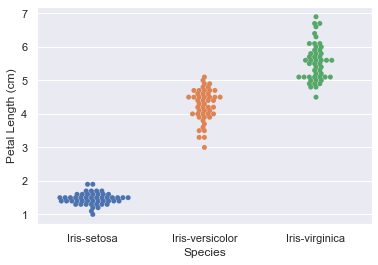

In [53]:
sns.swarmplot(x='Species', y='PetalLengthCm',data=df)

_ = plt.xlabel('Species')
_ = plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()



# Empirical cumulative distribution function

In [76]:
setosa_petal_length = np.array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4])

versicolor_petal_length = np.array([ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
        4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
        4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
        5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
        4.2,  4.2,  4.2,  4.3,  3. ,  4.1])

versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

virginica_petal_length = np.array([ 6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,  5.1,
        5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,  4.9,
        6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,  5.6,
        5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,  5.9,
        5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

In [55]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y

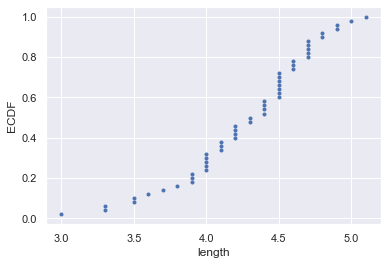

In [56]:
# Compute ECDF for versicolor data
x_vers, y_vers = ecdf(versicolor_petal_length)

#plot
_= plt.plot(x_vers, y_vers, marker='.', linestyle='none')


_= plt.ylabel('ECDF')
_= plt.xlabel('length')

plt.show()


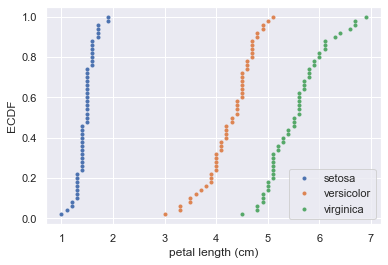

In [64]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_= plt.plot(x_set, y_set, marker='.', linestyle='none')

_= plt.plot(x_vers, y_vers, marker='.', linestyle='none')

_= plt.plot(x_virg, y_virg,marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Quantitative exploratory data analysis

In [62]:
#Mean
mean_length_vers = np.mean(versicolor_petal_length)

print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### IQR

[3.3    4.     4.35   4.6    4.9775]


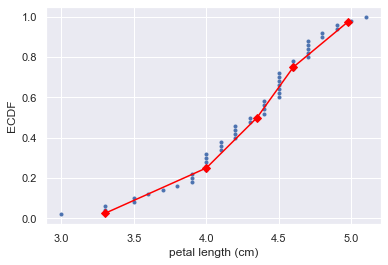

In [69]:
#Interquartile range
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

print(ptiles_vers)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red')

plt.show()

### BoxPlot

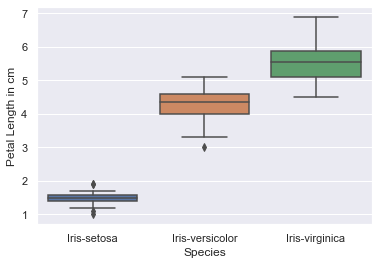

In [72]:
#BoxPlot
_= sns.boxplot(x='Species', y='PetalLengthCm',data=df)

_= plt.xlabel('Species')
_=plt.ylabel('Petal Length in cm')

plt.show()


### Variance and Standard Deviation

In [73]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)


diff_sq = np.square(differences)

variance_explicit = np.mean(diff_sq)


variance_np = np.var(versicolor_petal_length)

print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


In [74]:
variance = np.var(versicolor_petal_length)

print(np.sqrt(variance))

print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


### Covariance and the Pearson correlation coefficient


# Scatter Plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

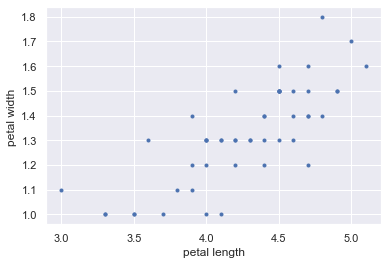

In [77]:
_= plt.plot(versicolor_petal_length,versicolor_petal_width, marker='.',linestyle='none')


_= plt.xlabel('petal length')

_= plt.ylabel('petal width ')

plt.show()

### Covariance

In [84]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)


print(covariance_matrix)


petal_cov = covariance_matrix[0, 1]

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Function to Compute Pearson correlation coefficient between two arrays.

In [86]:
def pearson_r(x,y):  
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
